# Introduction
Neural networks have become a powerful tool for solving machine learning tasks. They are used in various fields, from image recognition to time series forecasting. In this article, we will compare different neural network architectures using a built-in dataset. We will use Python and the Keras library for our experiments.

# Dataset Description
For the experiment, we will use the built-in diabetes dataset from the scikit-learn library. This dataset contains information about diabetes patients, including parameters such as age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable is the progression of the disease one year after the first measurements.

# Data Preparation
Before working with neural networks, we need to prepare the data: split it into training and test sets, and normalize it.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural Network Architectures


# Simple Fully Connected Neural Network
The first model will be a simple fully connected neural network (MLP). It consists of several dense layers.

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model_mlp.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_mlp = model_mlp.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)


2024-06-17 10:54:58.321811: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 10:54:58.322633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 10:54:58.469392: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Convolutional Neural Network
Next, we will add a convolutional neural network (CNN). Although CNNs are often used for image processing, we can apply them to our data by reshaping it appropriately.

In [3]:
from tensorflow.keras.layers import Conv1D, Flatten

# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the model
model_cnn = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=100, validation_split=0.2, verbose=0)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Recurrent Neural Network
Recurrent neural networks (RNNs) are particularly useful for processing sequential data. We will consider a simple RNN based on LSTM.

In [4]:
from tensorflow.keras.layers import LSTM

# Create the model
model_rnn = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], 1)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_rnn = model_rnn.fit(X_train_cnn, y_train, epochs=100, validation_split=0.2, verbose=0)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Model Evaluation
Now we will evaluate our models on the test set and compare them using the mean absolute error (MAE) and mean squared error (MSE) metrics.

In [5]:
# Evaluate MLP model
mae_mlp, mse_mlp = model_mlp.evaluate(X_test, y_test, verbose=0)

# Evaluate CNN model
mae_cnn, mse_cnn = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)

# Evaluate RNN model
mae_rnn, mse_rnn = model_rnn.evaluate(X_test_cnn, y_test, verbose=0)

print(f'MLP: MAE = {mae_mlp:.2f}, MSE = {mse_mlp:.2f}')
print(f'CNN: MAE = {mae_cnn:.2f}, MSE = {mse_cnn:.2f}')
print(f'RNN: MAE = {mae_rnn:.2f}, MSE = {mse_rnn:.2f}')

MLP: MAE = 2980.99, MSE = 43.72
CNN: MAE = 2905.12, MSE = 42.76
RNN: MAE = 3949.15, MSE = 53.36


# Visualization of Results
To visualize the results, we will plot the training and validation loss (MAE) for each model.

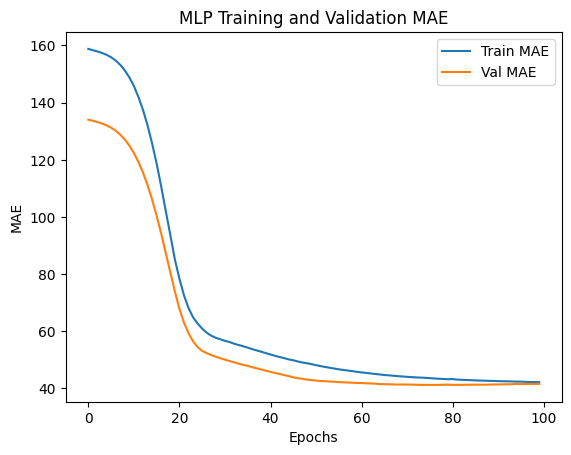

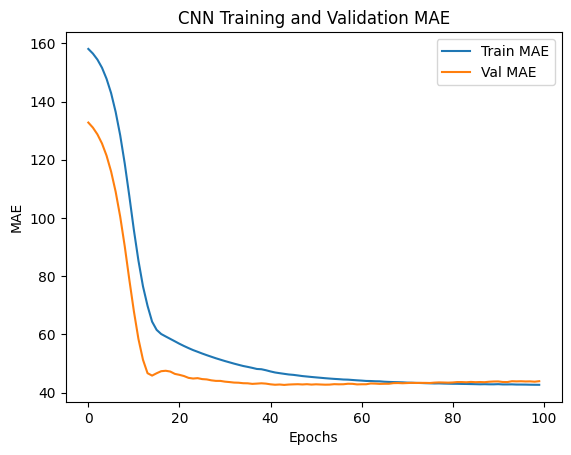

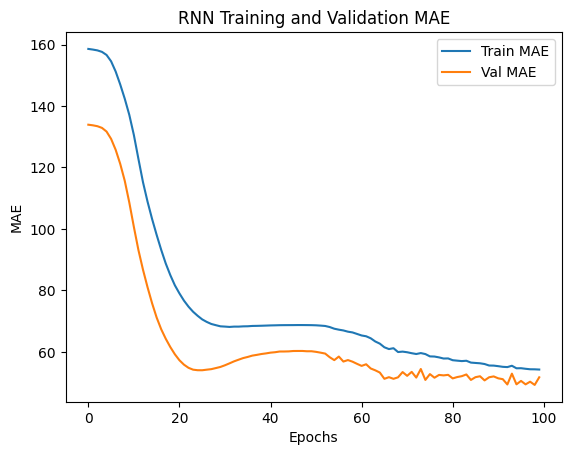

In [6]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_history(history, title):
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Val MAE')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

# Plot for MLP
plot_history(history_mlp, 'MLP Training and Validation MAE')

# Plot for CNN
plot_history(history_cnn, 'CNN Training and Validation MAE')

# Plot for RNN
plot_history(history_rnn, 'RNN Training and Validation MAE')


# Conclusion
We examined three different neural network architectures for analyzing the built-in diabetes dataset: a fully connected network (MLP), a convolutional network (CNN), and a recurrent network (RNN). By evaluating them using MAE and MSE metrics, we can draw conclusions about which model performed best on this dataset. Additionally, visualizing the training process helps us to see the effectiveness of each model.

Using different neural network architectures allows us to find the most suitable model for a specific task, considering the data characteristics and the required forecast accuracy.